In [1]:
import Data_Preprocessing.Graph_Data as gd
from Data_Preprocessing.Graph_Data import Molecule_data
from models.AttentiveFPModel import AttentiveFP
import matplotlib.pyplot as plt
import torch
from torch_geometric.loader import DataLoader

from models.gat import GATNet
import torch.nn as nn
from models.gcn import GCNNet
from models.gat_gcn import GAT_GCN
from models.ginconv import GINConvNet

In [2]:
if torch.cuda.is_available():  
    device = "cuda:2"
    print("cuda:2")
else:  
    device = "cpu" 
    print(torch.cuda.is_available())

cuda:2


In [3]:
test_data = Molecule_data(root='data', dataset='test_data_set',y=None,smile_graph=None,smiles=None)
train_data = Molecule_data(root='data', dataset='train_data_set',y=None,smile_graph=None,smiles=None)

In [4]:
TRAIN_BATCH_SIZE = 17

In [5]:
test_loder  = DataLoader(test_data,batch_size=TRAIN_BATCH_SIZE,shuffle=True)
train_loder   = DataLoader(train_data,batch_size=TRAIN_BATCH_SIZE,shuffle=True)

In [6]:
model = GATNet().to(device)
print(model)

GATNet(
  (D1_gcn1): GATConv(114, 114, heads=3)
  (D1_gcn2): GATConv(342, 128, heads=1)
  (D1_fc_g1): Linear(in_features=128, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [7]:
model_file_name = 'GATNet.model'
model.load_state_dict(torch.load(model_file_name))

<All keys matched successfully>

In [8]:
y_pred_arr = []
target_array = []
for data in test_loder:
    data = data.to(device)
    #y_pred = model(data.x.float(), data.edge_index,data.batch)
    y_pred = model(data)
    y_pred_arr.append(y_pred)
    target_array.append(data.y.float())

In [9]:
y_ped=torch.cat(y_pred_arr).view(-1).cpu().detach().numpy()
y_true=torch.cat(target_array).cpu().detach().numpy()

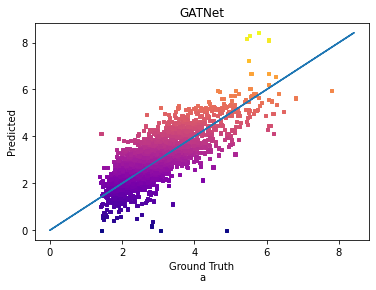

In [10]:
plt.scatter(y_ped,y_true,s=10,marker ="s",c=y_true,cmap=plt.get_cmap('plasma'))
plt.plot(y_true,y_true)
plt.xlabel('Ground Truth\na')
plt.ylabel('Predicted')
plt.title('GATNet')
plt.grid(False)
plt.savefig('GATNet.png', dpi=400,transparent=True)
plt.show()

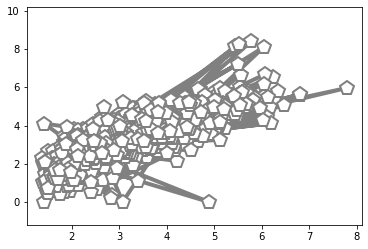

In [11]:
plt.plot(y_ped, y_true, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 10.2);

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [13]:
MSE = mean_squared_error(y_true, y_ped)
print(MSE)

0.4169596


In [14]:
print(mean_absolute_error(y_true,y_ped))

0.50154215


In [15]:
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.645724100186473


# Train

In [ ]:
y_pred_arr_train = []
target_array_train = []
for data in train_loder:
    data = data.to(device)
    #y_pred = model(data.x.float(), data.edge_index,data.batch)
    y_pred = model(data)
    y_pred_arr_train.append(y_pred.float())
    target_array_train.append(data.y.float())

In [ ]:
y_ped_train = torch.cat(y_pred_arr_train).view(-1).cpu().detach().numpy()
y_true_train = torch.cat(target_array_train).cpu().detach().numpy()

In [ ]:
plt.scatter(y_ped_train,y_true_train,s=5,c=y_true_train,cmap=plt.get_cmap('plasma'))
plt.plot(y_true_train,y_true_train)
plt.show()

In [ ]:
print(mean_absolute_error(y_true_train,y_ped_train))

In [ ]:
MSE = mean_squared_error(y_true_train, y_ped_train)
print(MSE)

In [ ]:
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)